In [1]:
# Import all packages and helpter functions
import sys
sys.path.append('../')
from utils import *

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 '01-import-node-and-edges-5c.ipynb',
 '02-import-elevation-info-node.ipynb',
 'loading_osm.ipynb',
 'plottedClaremont.xml',
 'testData.xml']

In [9]:
graph = ox.core.graph_from_file('plottedClaremont.xml', network_type='all_private', simplify=True, retain_all=False, name='unnamed')

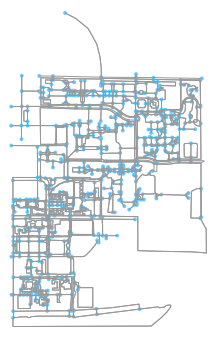

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

In [11]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes.to_csv(raw_path + '5c_nodes2.csv', index = False)
edges.to_csv(raw_path + '5c_edges2.csv', index = False)


In [12]:
print(nodes.shape)
nodes.head()

(888, 5)


,highway,osmid,x,y,geometry
3835445345,NaN,3835445345,-117.709,34.103,POINT (-117.7092997 34.1029743)
2247762320,NaN,2247762320,-117.708,34.1051,POINT (-117.7081591 34.1050973)
2247762331,NaN,2247762331,-117.705,34.1052,POINT (-117.7052972 34.1052271)
2247762347,NaN,2247762347,-117.713,34.1055,POINT (-117.7125478 34.1055069)
2247762350,NaN,2247762350,-117.707,34.1056,POINT (-117.7071645 34.1055588)


In [13]:
print(edges.shape)
edges.head()

(2464, 15)


,access,area,geometry,highway,key,landuse,lanes,length,name,oneway,osmid,ref,service,u,v
0,private,NaN,"LINESTRING (-117.7092997 34.1029743, -117.7093...",service,0,NaN,NaN,20.998,Amherst Avenue,False,13433612,NaN,NaN,3835445345,5366824647
1,private,NaN,"LINESTRING (-117.7092997 34.1029743, -117.7093...",service,0,NaN,NaN,241.977,"[East 9th Street, Amherst Avenue]",False,"[13433612, 13441725]",NaN,NaN,3835445345,123586950
2,NaN,NaN,"LINESTRING (-117.7092997 34.1029743, -117.7092...",path,0,NaN,NaN,109.109,Quotation Walk,False,380203392,NaN,NaN,3835445345,3835445353
3,NaN,NaN,"LINESTRING (-117.7081591 34.1050973, -117.7082...",residential,0,NaN,NaN,48.125,Platt Boulevard,True,34037087,NaN,NaN,2247762320,390040406
4,NaN,NaN,"LINESTRING (-117.7081591 34.1050973, -117.7079...",footway,0,NaN,NaN,57.137,NaN,False,215361430,NaN,NaN,2247762320,5257160046


In [14]:
edges.isna().sum().sort_values(ascending = False)/len(edges)

area        0.998377
ref         0.997971
lanes       0.997159
landuse     0.995130
service     0.984984
access      0.967532
name        0.868101
highway     0.318182
v           0.000000
u           0.000000
osmid       0.000000
oneway      0.000000
length      0.000000
key         0.000000
geometry    0.000000
dtype: float64

In [16]:
place_name = "The Claremont Colleges"# "Harvey Mudd College" # "Claremont" #"The Claremont Colleges"
area = ox.gdf_from_place(place_name)
buildings = ox.buildings_from_place(place_name)

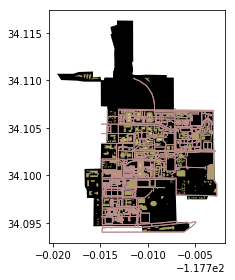

In [17]:
fig, ax = plt.subplots()
area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)
plt.tight_layout()

In [18]:
print(min(nodes['x']), max(nodes['x']), min(nodes['y']), max(nodes['y']))

-117.7149387 -117.7030179 34.09446116866 34.1102325
